<a href="https://colab.research.google.com/github/bulentsoykan/IDS6938-Computational-Optimization-Models-and-Methods/blob/main/Knapsack_Problem_using_Dynamic_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Knapsack Problem using Dynamic Programming

## Introduction
The knapsack problem is a well-known optimization problem. It involves selecting a subset of items, each with a weight and a value, to maximize the total value without exceeding a given weight capacity.

## Dynamic Programming Approach
We will solve the knapsack problem using a bottom-up dynamic programming approach. This method is efficient and guarantees an optimal solution.

## Function Definition
The following function `knapsack` takes three arguments:
- `values`: a list of integers representing the values of the items
- `weights`: a list of integers representing the weights of the items
- `capacity`: an integer representing the maximum capacity of the knapsack

The function returns the maximum total value that can be accommodated within the knapsack capacity.

In [2]:
def knapsack(values, weights, capacity):
    try:
        # Check for input errors
        if len(values) != len(weights):
            raise ValueError("Length of values and weights must be the same.")
        if capacity < 0:
            raise ValueError("Capacity must be a non-negative integer.")

        n = len(values)  # Number of items
        # Create a 2D DP array to store the maximum value that can be obtained using the first i items and capacity
        dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]

        # Build the DP table in bottom-up manner
        for i in range(1, n + 1):
            for w in range(1, capacity + 1):
                if weights[i-1] <= w:
                    # If the current item can fit in the knapsack, choose the maximum between taking the item and not taking it
                    dp[i][w] = max(dp[i-1][w], dp[i-1][w-weights[i-1]] + values[i-1])
                else:
                    # If the current item cannot fit, do not take it
                    dp[i][w] = dp[i-1][w]

        # The answer to the problem is in dp[n][capacity], which represents considering all items with the full capacity.
        return dp[n][capacity]

    except ValueError as ve:
        print(f"Input error: {ve}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

## Example Usage

Let's test the `knapsack` function with the following example:

- `values = [60, 100, 120]`
- `weights = [10, 20, 30]`
- `capacity = 50`

The goal is to determine the maximum value that can be achieved with a knapsack capacity of 50.

In [3]:
# Example usage
values = [60, 100, 120]  # The values of the items
weights = [10, 20, 30]  # The weights of the items
capacity = 50  # The maximum capacity of the knapsack

result = knapsack(values, weights, capacity)
if result is not None:
    print("The maximum total value in the knapsack is:", result)

The maximum total value in the knapsack is: 220


## Visualization of the DP Table

For a better understanding, let's visualize the DP table that was constructed during the execution of the `knapsack` function. This table helps us understand how the solution is built up step by step.

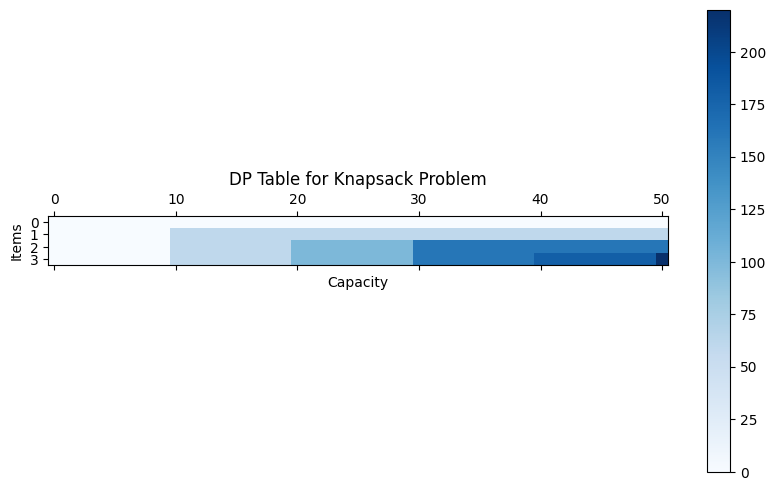

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Function to visualize the DP table
def visualize_knapsack_dp_table(values, weights, capacity):
    n = len(values)
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]

    for i in range(1, n + 1):
        for w in range(1, capacity + 1):
            if weights[i-1] <= w:
                dp[i][w] = max(dp[i-1][w], dp[i-1][w-weights[i-1]] + values[i-1])
            else:
                dp[i][w] = dp[i-1][w]

    # Convert to numpy array for better visualization
    dp_array = np.array(dp)
    fig, ax = plt.subplots(figsize=(10, 6))
    cax = ax.matshow(dp_array, cmap="Blues")
    fig.colorbar(cax)
    ax.set_xlabel("Capacity")
    ax.set_ylabel("Items")
    ax.set_title("DP Table for Knapsack Problem")

    plt.show()

# Visualize the DP table
visualize_knapsack_dp_table(values, weights, capacity)